In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Week2 授業前課題1 小麦とチェス盤問題
　曽呂利新左衛門の米の逸話に似たものとして、小麦とチェス盤の話があります。これを題材に多次元配列を扱うための数値計算ライブラリ NumPy の使い方に慣れていきます。

If a chessboard were to have wheat placed upon each square such that one grain were placed on the first square, two on the second, four on the third, and so on (doubling the number of grains on each subsequent square), how many grains of wheat would be on the chessboard at the finish?

Wheat and chessboard problem - Wikipedia
（最終閲覧日：2019年5月31日）

8×8マスのチェス盤の上に、小麦の粒を1, 2, 4と順番に置いていくと最終的な小麦の数はどのようになるかという問題です。

＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿
### 【問題1】2×2マスのチェス盤の小麦の数
2×2マスのチェス盤をndarrayによって表現し、各マスの小麦の数を計算してください。左上のマスに小麦を1つ置いた後、その右が2つ、左下が4つ、右下が8つという風に進みます。

サンプルコードで作成したndarrayのshapeの変形を行ってください。

In [2]:
# サンプルコード
n_squares = 4
small_board_list = [1]
for _ in range(n_squares - 1):
    small_board_list.append(2*small_board_list[-1])
print("4マスの板に小麦を並べる（リスト）：{}".format(small_board_list))

4マスの板に小麦を並べる（リスト）：[1, 2, 4, 8]


In [3]:
# サンプルコード
small_board_ndarray = np.array(small_board_list)
print("4マスの板に小麦を並べる（ndarray）：{}".format(small_board_ndarray))

4マスの板に小麦を並べる（ndarray）：[1 2 4 8]


In [4]:
# ndarrayを2x2の形に変換
print("4マスの板に小麦を並べる（ndarray）2x2：\n{}".format(small_board_ndarray.reshape(2, 2)))

4マスの板に小麦を並べる（ndarray）2x2：
[[1 2]
 [4 8]]


### 【問題2】n×mマスへの拡張
 n×mマスのチェス盤の小麦の数を記したndarrayを返す関数を作成してください。そして、この関数を使い8×8マスのチェス盤の小麦の数を求めてください。

In [5]:
# n x m マスのチェス盤の小麦の数を返す関数
def make_ndarray(n, m):      
    n_squares = n * m # マス目の総数（n x m） 
    small_board_list = [1] # チェス盤のマスの初期値をリストに入力
    
    # 残りのマスの小麦の数をリストに追加
    for _ in range(n_squares - 1):
        small_board_list.append(2*small_board_list[-1])
    
    small_board_ndarray = np.array(small_board_list).reshape(n, m) # ndarray配列を作成し、n x mの形に変換
    return small_board_ndarray

# n x m の値を代入
n = 8
m = 8

nm_board_ndarray= make_ndarray(n, m)

print(nm_board_ndarray)   

[[1.00000000e+00 2.00000000e+00 4.00000000e+00 8.00000000e+00
  1.60000000e+01 3.20000000e+01 6.40000000e+01 1.28000000e+02]
 [2.56000000e+02 5.12000000e+02 1.02400000e+03 2.04800000e+03
  4.09600000e+03 8.19200000e+03 1.63840000e+04 3.27680000e+04]
 [6.55360000e+04 1.31072000e+05 2.62144000e+05 5.24288000e+05
  1.04857600e+06 2.09715200e+06 4.19430400e+06 8.38860800e+06]
 [1.67772160e+07 3.35544320e+07 6.71088640e+07 1.34217728e+08
  2.68435456e+08 5.36870912e+08 1.07374182e+09 2.14748365e+09]
 [4.29496730e+09 8.58993459e+09 1.71798692e+10 3.43597384e+10
  6.87194767e+10 1.37438953e+11 2.74877907e+11 5.49755814e+11]
 [1.09951163e+12 2.19902326e+12 4.39804651e+12 8.79609302e+12
  1.75921860e+13 3.51843721e+13 7.03687442e+13 1.40737488e+14]
 [2.81474977e+14 5.62949953e+14 1.12589991e+15 2.25179981e+15
  4.50359963e+15 9.00719925e+15 1.80143985e+16 3.60287970e+16]
 [7.20575940e+16 1.44115188e+17 2.88230376e+17 5.76460752e+17
  1.15292150e+18 2.30584301e+18 4.61168602e+18 9.22337204e+18]]

＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿
## 【問題3】小麦の数の合計
8×8マスのチェス盤の小麦の数の合計を求めてください。また、各列の平均を求め、それを棒グラフで可視化してください。

棒グラフはサンプルコードを用意しています。

In [6]:
#棒グラフのサンプルコード
'''
import matplotlib.pyplot as plt
%matplotlib inline

plt.xlabel("column")
plt.ylabel("number")
plt.title("number in each column")
plt.bar(np.arange(1,4), np.array([1, 2, 3]))
plt.show()
'''

'\nimport matplotlib.pyplot as plt\n%matplotlib inline\n\nplt.xlabel("column")\nplt.ylabel("number")\nplt.title("number in each column")\nplt.bar(np.arange(1,4), np.array([1, 2, 3]))\nplt.show()\n'

In [7]:
total_grains = nm_board_ndarray.sum()
print("チェス盤の小麦の総数: {}".format(total_grains))

チェス盤の小麦の総数: 1.8446744073709552e+19


第 1 列の小麦の平均量：9042521604759584.00
第 2 列の小麦の平均量：18085043209519168.00
第 3 列の小麦の平均量：36170086419038336.00
第 4 列の小麦の平均量：72340172838076672.00
第 5 列の小麦の平均量：144680345676153344.00
第 6 列の小麦の平均量：289360691352306688.00
第 7 列の小麦の平均量：578721382704613376.00
第 8 列の小麦の平均量：1157442765409226752.00


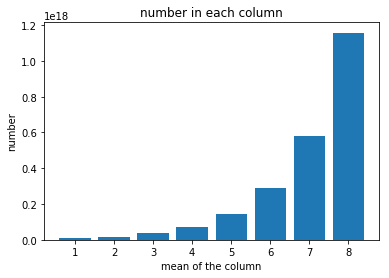

In [8]:
m_mean = nm_board_ndarray.mean(axis=0)

for i in range(m):
    print("第 {} 列の小麦の平均量：{:.2f}".format((i+1), m_mean[i]))

plt.xlabel("mean of the column")
plt.ylabel("number")
plt.title("number in each column")
#plt.bar(np.arange(1,4), np.array([1, 2, 3]))
plt.bar(np.arange(1, m+1), m_mean)
plt.show()
    

＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿
### 【問題4】小麦の数のヒートマップ
8×8マスのチェス盤の小麦の数をヒートマップとして可視化してください。
ヒートマップはサンプルコードを用意しています。
ヒートマップのサンプルコード
4行2列の配列のヒートマップです。値が小さいところが紫、大きいところが黄色になっています。

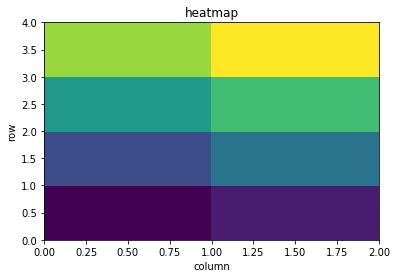

In [9]:
# サンプルコード
plt.xlabel("column")
plt.ylabel("row")
plt.title("heatmap")
plt.pcolor(np.array([0, 1, 3, 5, 7, 9, 11, 13]).reshape(4, 2))
plt.show()

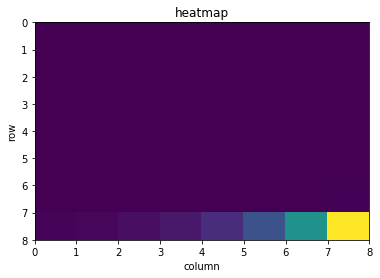

In [10]:
plt.xlabel("column")
plt.ylabel("row")
plt.title("heatmap")
plt.ylim(n, 0) # ｙ軸を反転(チェス盤の向きに合わせる)
plt.pcolor(nm_board_ndarray)
plt.show()

＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿
### 【問題5】後半は前半の何倍か
チェス盤の後半にある小麦の数は前半にある小麦の数の何倍かを求めてください。前半とは配列の0から3行目、後半は4から7行目です。

In [11]:
first_half, latter_half = np.split(nm_board_ndarray, 2) # チェス盤を半分に分割

print("チェス盤の前半の小麦の数量：{}".format(np.sum(first_half)))
print("チェス盤の後半の小麦の数量：{}".format(np.sum(latter_half)))
print("よってチェス盤の後半の小麦の数は前半の {} 倍である。".format(np.sum(latter_half) / np.sum(first_half)))

チェス盤の前半の小麦の数量：4294967295.0
チェス盤の後半の小麦の数量：1.8446744069414584e+19
よってチェス盤の後半の小麦の数は前半の 4294967296.0 倍である。


＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿
### 【問題6】他の計算方法によるn×mマスへの拡張
問題2と同様の「n×mマスのチェス盤の小麦の数を記したndarrayを返す関数」を、np.append()を使ったものと、ブロードキャストを使ったもので新たに作成してください。それらの関数を使い8×8マスのチェス盤の小麦の数を再び求めてください。

### (1) np.append()を使う方法

In [12]:
# n x m マスのチェス盤の小麦の数を返す関数
def make_ndarray(n, m):      
    n_squares = n * m # マス目の総数（n x m） 
    small_board_ndarray = np.array([1]).astype(np.uint64)# チェス盤のマスのndarrayに初期値を入れて作成
 
    # 残りのマスの小麦の数をリストに追加
    for _ in range(n_squares - 1):
        small_board_ndarray = np.append(small_board_ndarray, 2*small_board_ndarray[-1])
        
    small_board_ndarray = small_board_ndarray.reshape(n, m).astype(np.uint64) # ndarray配列を作成し、n x mの形に変換
    return small_board_ndarray.astype(np.uint64)

# n x m の値を代入
n = 8
m = 8

nm_board_ndarray= make_ndarray(n, m)

print(nm_board_ndarray)   

[[                  1                   2                   4
                    8                  16                  32
                   64                 128]
 [                256                 512                1024
                 2048                4096                8192
                16384               32768]
 [              65536              131072              262144
               524288             1048576             2097152
              4194304             8388608]
 [           16777216            33554432            67108864
            134217728           268435456           536870912
           1073741824          2147483648]
 [         4294967296          8589934592         17179869184
          34359738368         68719476736        137438953472
         274877906944        549755813888]
 [      1099511627776       2199023255552       4398046511104
        8796093022208      17592186044416      35184372088832
       70368744177664     140737488355328

### (2) ブロードキャストを使う方法

In [13]:
def make_ndarray(n, m):
    n_squares = n * m
    indices_of_squares = np.arange(n_squares).astype(np.uint64)
    small_board_ndarray = 2**indices_of_squares.reshape(n, m)
    return small_board_ndarray
    
nm_board_ndarray= make_ndarray(n, m)

print(nm_board_ndarray)   


[[                  1                   2                   4
                    8                  16                  32
                   64                 128]
 [                256                 512                1024
                 2048                4096                8192
                16384               32768]
 [              65536              131072              262144
               524288             1048576             2097152
              4194304             8388608]
 [           16777216            33554432            67108864
            134217728           268435456           536870912
           1073741824          2147483648]
 [         4294967296          8589934592         17179869184
          34359738368         68719476736        137438953472
         274877906944        549755813888]
 [      1099511627776       2199023255552       4398046511104
        8796093022208      17592186044416      35184372088832
       70368744177664     140737488355328

＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿
### 【問題7】計算時間の比較
3種類の方法を見てきました。それぞれの計算時間をJupyter Notebookの%%timeitを用いて計測し、比較と考察を行ってください。
%%timeitはセル内のコードを複数回実行し、その平均実行時間を出力する働きをします。

In [14]:
# サンプルコード
#%%timeit
#a = np.array([1, 2, 3])
#b = np.array([1, 2, 3])
#c = a + b

In [15]:
%%timeit
# リストをndarrayに変換する方法
def make_ndarray(n, m):      
    n_squares = n * m # マス目の総数（n x m） 
    small_board_list = [1] # チェス盤のマスの初期値をリストに入力
    # 残りのマスの小麦の数をリストに追加
    for _ in range(n_squares - 1):
        small_board_list.append(2*small_board_list[-1])
    small_board_ndarray = np.array(small_board_list).reshape(n, m) # ndarray配列を作成し、n x mの形に変換
    return small_board_ndarray.astype(np.uint64)

# n x m の値を代入
n = 8
m = 8

nm_board_ndarray= make_ndarray(n, m)

23.2 µs ± 464 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [16]:
%%timeit
# np.appendを使う方法
# n x m マスのチェス盤の小麦の数を返す関数
def make_ndarray(n, m):      
    n_squares = n * m # マス目の総数（n x m） 
    small_board_ndarray = np.array([1]).astype(np.uint64)# チェス盤のマスのndarrayに初期値を入れて作成
 
    # 残りのマスの小麦の数をリストに追加
    for _ in range(n_squares - 1):
        small_board_ndarray = np.append(small_board_ndarray, 2*small_board_ndarray[-1])
        
    small_board_ndarray = small_board_ndarray.reshape(n, m).astype(np.uint64) # ndarray配列を作成し、n x mの形に変換
    return small_board_ndarray.astype(np.uint64)

# n x m の値を代入
n = 8
m = 8

nm_board_ndarray= make_ndarray(n, m)

428 µs ± 2.46 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [17]:
%%timeit
# ブロードキャストを使う方法
def make_ndarray(n, m):
    n_squares = n * m
    indices_of_squares = np.arange(n_squares).astype(np.uint64)
    small_board_ndarray = 2**indices_of_squares.reshape(n, m)
    return small_board_ndarray

n = 8
m = 8

nm_board_ndarray= make_ndarray(n, m)

6.2 µs ± 47.4 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


【考察】
・ブロードキャストを使う方法が最も速度が速く、np.appendを使う方法が最も遅い
・前者は後者に比べて7倍ほど早い結果になった